In [2]:
import numpy as np
import theano.tensor as T
# from theano     theano.function
from theano import function
import theano

# 建立x容器
x=T.dscalar('x')
y=T.dscalar('y')
z=x+y
# 使用function定义theano的方程，将输入值x,y放在[]中，输出值放在后面
f=function([x,y],z)
print(f(2,3))

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


5.0


In [3]:
# 单独为每一个标量定义
x=T.dscalar('x')
#或者一次性定义多个
x,y=T.dscalars('x','y')



#向量的定义和操作
#方式1
x,y=T.dvectors('x','y')

#方式2
x=T.dvector('x')
y=T.dvector('y')

#矩阵的
#方式1
x=T.dmatrix('x')
y=T.dmatrix('y')

#方式2
x,y=T.dmatrices('x','y')


In [4]:
from theano import pp
# 使用（pretty-print）pp打印除原始方程
print(pp(z))

(x + y)


In [5]:
# 定义矩阵，以及相关运算
x=T.dmatrix('x')
y=T.dmatrix('y')
z=x+y
f=function([x,y],z)
# arange返回的是一个数组，
# reshape(行，列)注意-1情况
arr=np.arange(12)
#print(arr.reshape(-1,1))
print(arr.reshape(3,4))
# ones创建任意维度和元素个数数组，元素值都为1
print(np.ones((3,4)))
print(f(arr.reshape((3,4)),10*np.ones((3,4))))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ 10.  11.  12.  13.]
 [ 14.  15.  16.  17.]
 [ 18.  19.  20.  21.]]


In [6]:
x=T.dmatrix('x')
s=1/(1+T.exp(-x))
logistic=function([x],s)
print(logistic([[0,1],[-2,-3]]))

[[ 0.5         0.73105858]
 [ 0.11920292  0.04742587]]


In [7]:
# 多输入多输出的function
# 假定输入值两个，输出也是两个，指定输入值矩阵a,b
a,b=T.dmatrices('a','b')
diff=a-b
abs_diff=abs(diff)
diff_squared=diff**2
f=function([a,b],[diff,abs_diff,diff_squared])
x1,x2,x3=f(
    np.ones((2,2)),
    np.arange(4).reshape((2,2))
)
print(x1,x2,x3)

[[ 1.  0.]
 [-1. -2.]] [[ 1.  0.]
 [ 1.  2.]] [[ 1.  0.]
 [ 1.  4.]]


In [8]:
# function的名字
x,y,w=T.dscalars('x','y','w')
z=(x+y)*w
f=theano.function([x,theano.In(y,value=1),theano.In(w,value=2)],z)
#使用默认值
print(f(23))
#不使用默认值
print(f(23,3,3))

48.0
78.0


In [9]:
#添加名字
f = theano.function([x,
                     theano.In(y, value=1),
                     theano.In(w,value=2,name='weights')],
                    z)
                    
print (f(23,1,weights=4)) ##调用方式

96.0


In [10]:
# 共享变量
import theano
state=theano.shared(np.array(0,dtype=np.float64),'state')# 初始化
# 不能使用np.float64指定类型，需要使用dtype=state.dtype
inc=T.scalar('inc',dtype=state.dtype)
accumulator=theano.function([inc],state,updates=[(state,state+inc)])
# get_value获取共享变量的值
print(state.get_value())
accumulator(1)
print(state.get_value())
# 设置共享变量的值
state.set_value(-1)
accumulator(10)
print(state.get_value())

0.0
1.0
9.0


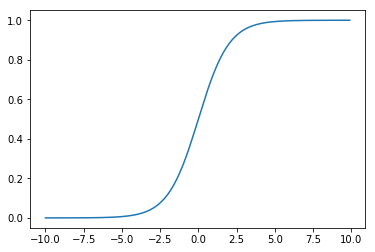

In [11]:
# 激励函数Activation function
# http://deeplearning.net/software/theano/library/tensor/nnet/nnet.html
%matplotlib inline
import matplotlib.pyplot as plt
x=T.dvector('x')
y=T.nnet.sigmoid(x)
sigmoid=theano.function([x],y)
x_=np.arange(-10,10,0.1)
y_=sigmoid(x_)
plt.plot(x_,y_)



[[ 0.2  0.2]
 [ 0.2  0.2]
 [ 0.2  0.2]
 [ 0.2  0.2]]


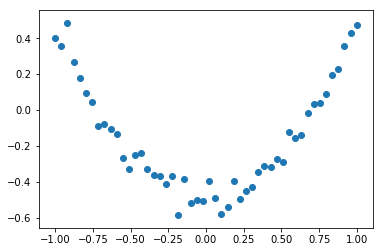

In [12]:
print(np.zeros((4,2))+0.2)
np.linspace(2.0, 3.0, num=5,endpoint=True)
#linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]    
#start开始点，stop结束点 num:点的个数  endpoint:是否包含结束点stop True/False retstep=True输出步长
x_data=np.linspace(-1,1,50)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)-0.5+noise #y = x^2 - 0.5 + wihtenoise
plt.scatter(x_data,y_data)
plt.show()


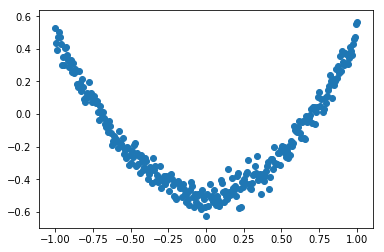

0.7438622827410474
0.019110025945154173
0.008978049983026247
0.007439726609504615
0.006968003942284306
0.00661663584033731
0.0062065912099260245
0.005763130542675502
0.0053973814134329395
0.005096355385721177


In [13]:
#定义 Layer 类
# inputs表示输入 1输入1维  10表示输出10维  relu激活函数
# layer1=Layer(inputs,1,10,T.nnet.relu)
#第一层的输出是第二层输入，则输入10维  输出1维
# layer2=Layer(layer1,outputs,10,1,None)

# np.random.normal(loc=0.0, scale=1.0, size=None) 
# loc：float
#     此概率分布的均值（对应着整个分布的中心centre）
# scale：float
#     此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）
# size：int or tuple of ints
#     输出的shape，默认为None，只输出一个值

#一般会用np.random.randn(size)标准正态分布（μ=0,σ=1）对应np.random.normal(loc=0, scale=1, size)

# zeros(shape, dtype=float, order='C')此例是out_size列，一行数组
#dot是矩阵的乘法
class Layer(object):
    #构造函数 
    def __init__(self,inputs,in_size,out_size,activation_function=None):
        self.W = theano.shared(np.random.normal(0,1,(in_size,out_size)))
        #b初始值0.1数组
        self.b=theano.shared(np.zeros((out_size,))+0.1)
        self.Wx_plus_b=T.dot(inputs,self.W)+self.b
        self.activation_function=activation_function
        if activation_function is None:
            self.outputs=self.Wx_plus_b
        else:
            self.outputs=self.activation_function(self.Wx_plus_b)

            
#linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]    
#start开始点，stop结束点 num:点的个数  endpoint:是否包含结束点stop True/False retstep=True输出步长
x_data=np.linspace(-1,1,300)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)-0.5+noise #y = x^2 - 0.5 + wihtenoise
plt.scatter(x_data,y_data)
plt.show()

#定义神经网络的输入与目标,默认float64类型
x=T.dmatrix('x')
y=T.dmatrix('y')
layer1=Layer(x,1,10,T.nnet.relu)
layer2=Layer(layer1.outputs,10,1,None)
#损失函数 .mean是求
const=T.mean(T.square(layer2.outputs-y))

#计算梯度
gW1, gb1, gW2, gb2 = T.grad(const, [layer1.W, layer1.b, layer2.W, layer2.b])


#定义学习率
learning_rate=0.05

#梯度下降算法
train=function(
inputs=[x,y],
    outputs=const,
    updates=[(layer1.W,layer1.W-learning_rate*gW1),
            (layer1.b,layer1.b-learning_rate*gb1),
             (layer2.W,layer2.W-learning_rate*gW2),
            (layer2.b,layer2.b-learning_rate*gb2)
            ])
#预测函数
predict=theano.function(inputs=[x],outputs=layer2.outputs)


#训练
for i in range(500):
    err=train(x_data,y_data)
    if i% 50 == 0:
        print(err)
    

In [14]:
#Classification 分类学习

#计算问题准确率函数
rng=np.random
N=400  #训练数据量
feats=784 #输入的特征数

#生成的随机数D = (input_values, target_class)
#randint生成随机整数 size生成的个数 low:生成的最小值 high生成的最大值（不包含）
D=(rng.randn(N,feats),rng.randint(size=N,low=0,high=2))

#建立模型

#定义x,y容器
x=T.dmatrix('x')
y=T.dvector('y')

#初始化权重W，偏置b
W=theano.shared(rng.randn(feats),name="W")
b=theano.shared(0.,name="b")

p_1=T.nnet.sigmoid(T.dot(x,W)+b) #sigmoid激励函数
prediction=p_1>0.5
#交叉熵
xent=-y*T.log(p_1)-(1-y)*T.log(1-p_1)
#或者 xent = T.nnet.binary_crossentropy(p_1, y) 

cost=xent.mean()+0.01*(W**2).sum() #L2正则化
gW,gb=T.grad(cost,[W,b])


#激活模型

learning_rate=0.1
train=theano.function(
inputs=[x,y],
    outputs=[prediction,xent.mean()],
    updates=((W,W-learning_rate*gW),(b,b-learning_rate*gb)))
predict=theano.function(inputs=[x],outputs=prediction)

#训练模型
# Training

def compute_accuracy(y_target,y_predict):
    corret_prediction=np.equal(y_predict,y_target)
    accuracy=np.sum(correct_prediction)/len(correct_prediction)
    return accuracy

for i in range(500):
    pred, err = train(D[0], D[1])
    if i % 50 ==0:
        print('cost:', err)
        

        

cost: 12.05641218288364
cost: 6.290385162535431
cost: 2.8342746280240863
cost: 1.1926287553106607
cost: 0.4397660557048588
cost: 0.1642693651388501
cost: 0.06926879602657339
cost: 0.047080169822803414
cost: 0.04085317431999816
cost: 0.03838153733893754


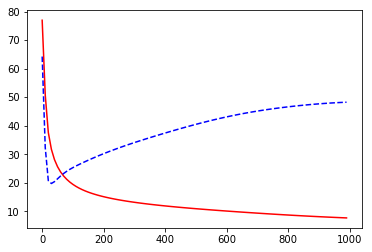

In [24]:
#正规化
#对于训练集，学习的效果非常好，甚至接近完美地穿过每个点，或者非常准确地进行了分类，但是把这个模型应用于新的数据集上，
#表现就特别差。这种现象叫做过拟合
from sklearn.datasets import load_boston
np.random.seed(100)
#数据进行归一化，
def minmax_normalization(data):
    xs_max=np.max(data,axis=0)
    xs_min=np.min(data,axis=0)
    xs=(1-0)*(data-xs_min)/(xs_max-xs_min)+0
    return xs;


# load_boston 房价数据，有 500 多个样本，13 个 feature，每个样本对应一个房价。 其中 y 通过增加维度 [:, np.newaxis] 由列表结构变成了矩阵的形式。
x_data=load_boston().data
x_data=minmax_normalization(x_data)
y_data=load_boston().target[:,np.newaxis]


#把数据集分为训练集和测试集，交叉验证，来检验是否真正的学习好了，交叉验证还可以筛选合适的参数
x_train, y_train = x_data[:400], y_data[:400]
x_test,y_test=x_data[400:],y_data[400:]

x=T.dmatrix('x')
y=T.dmatrix('y')

#建立模型,建立两个神经层 layer1有13个属性，50个神经元，激活函数tanh，layer2的输入时1的输出，有50个，输出为房价，只有一个
layer1=Layer(x,13,50,T.tanh)
layer2=Layer(layer1.outputs,50,1,None)

#计算损失函数，
cost=T.mean(T.square(layer2.outputs-y))# 没有正则化

#cost=T.mean(T.square(layer2.outputs-y))+0.1*((layer1.W**2).summ())# L2正规化
#cost=T.mean(T.square(layer2.outputs-y))+0.1*(abs(layer1.W).sum()+abs(layer2.W).sum()) #L1正规化

#计算梯度
gW1,gb1,gW2,gb2=T.grad(cost,[layer1.W,layer1.b,layer2.W,layer2.b])

#激活模型

#定义学习率，训练函数
learning_rate=0.01
train=theano.function(
    inputs=[x,y],
    updates={(layer1.W,layer1.W-learning_rate*gW1),
            (layer1.b,layer1.b-learning_rate*gb1),
             (layer2.W,layer2.W-learning_rate*gW2),
            (layer2.b,layer2.b-learning_rate*gb2)
            })

compute_cost=theano.function(inputs=[x,y],outputs=cost)

#训练模型

#记录误差函数，训练100次，每10步记录一次训练集合测试集的误差
train_err_list=[]
test_err_list=[]
learning_time=[]
for i in range(1000):
    train(x_train,y_train)
    if i%10==0:
        train_err_list.append(compute_cost(x_train,y_train))
        test_err_list.append(compute_cost(x_test,y_test))
        learning_time.append(i)
    
    
#可视化结果
plt.plot(learning_time,train_err_list, 'r-')
plt.plot(learning_time,test_err_list,'b--')
plt.show()

In [19]:

def printme( str ):
   "打印任何传入的字符串"
   print(str);
   return;

# 调用函数
printme("我要调用用户自定义函数!");
printme("再次调用同一函数");



我要调用用户自定义函数!
再次调用同一函数
